In [11]:
import pandas as pd
import numpy as np
import gc
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [30]:
data = pd.read_table('LORENZ.DAT', header=None)

# scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = np.array(data)

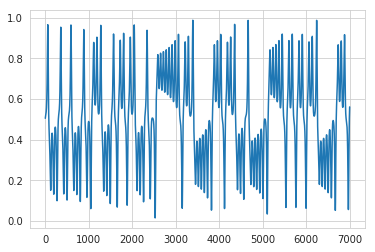

In [32]:
plt.plot(data[0:7000])

In [33]:
t = 16

unlagged = data[:-t]
lagged = np.roll(data, -t)[:-t]

In [42]:
from sklearn.svm import SVC
from sklearn.svm import SVR

In [72]:
clf = SVR(kernel='rbf', gamma='auto_deprecated')
clf.fit(unlagged[0:10000], lagged[0:10000])

/home/yura/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yura/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
test = clf.predict(lagged[10000:])

In [74]:
clf.score(lagged[10000:], lagged[10000:])

0.7527292362127929

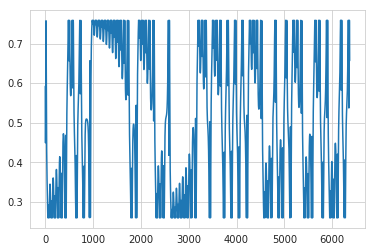

In [85]:
plt.plot(test[0:7000])


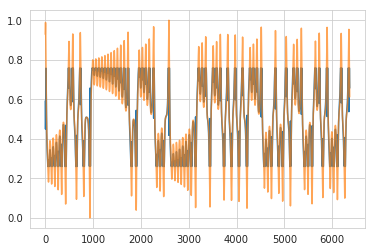

In [84]:
plt.plot(test[0:7000])
plt.plot(lagged[10000:17000], alpha=0.7)